In [7]:
import pandas as pd
train = pd.read_csv("D:/fallsemester/techfundamental/project/input/train.csv")
test = pd.read_csv("D:/fallsemester/techfundamental/project/input/test.csv")
print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

AxesSubplot(0.125,0.125;0.775x0.755)


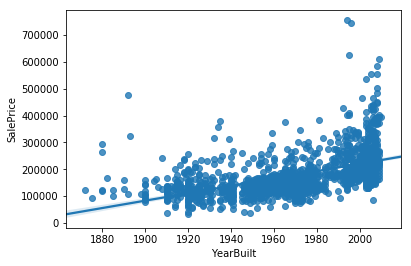

In [8]:
import seaborn as sns
print(sns.regplot(train.YearBuilt,train.SalePrice))
# relatively new house tends to be more expensive than old one.

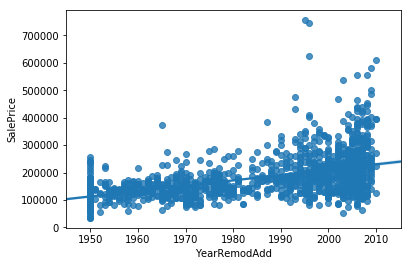

In [9]:
sns.regplot(train.YearRemodAdd,train.SalePrice)
#shows similar trend as previous one.

In [10]:
train_ID = train['Id']
test_ID = test['Id']
#store ID
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
#delete ID, it is just random numbers.
lentrain = len(train)
lentest = len(test)
print(lentrain)
print(lentest)

1460
1459


In [11]:
train = train.drop(train[(train['GrLivArea']>=4000) & (train['SalePrice']<300000)].index)
#delete outliers. I think there are two.


D:\tools\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


AxesSubplot(0.125,0.125;0.775x0.755)


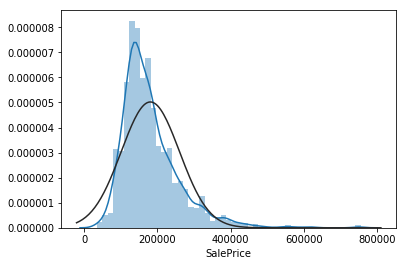

In [12]:
from scipy import stats
from scipy.stats import norm
print(sns.distplot(train['SalePrice'] , fit=norm))

D:\tools\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


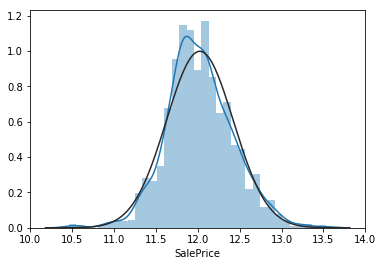

In [13]:
import numpy as np # linear algebra
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'] , fit=norm)

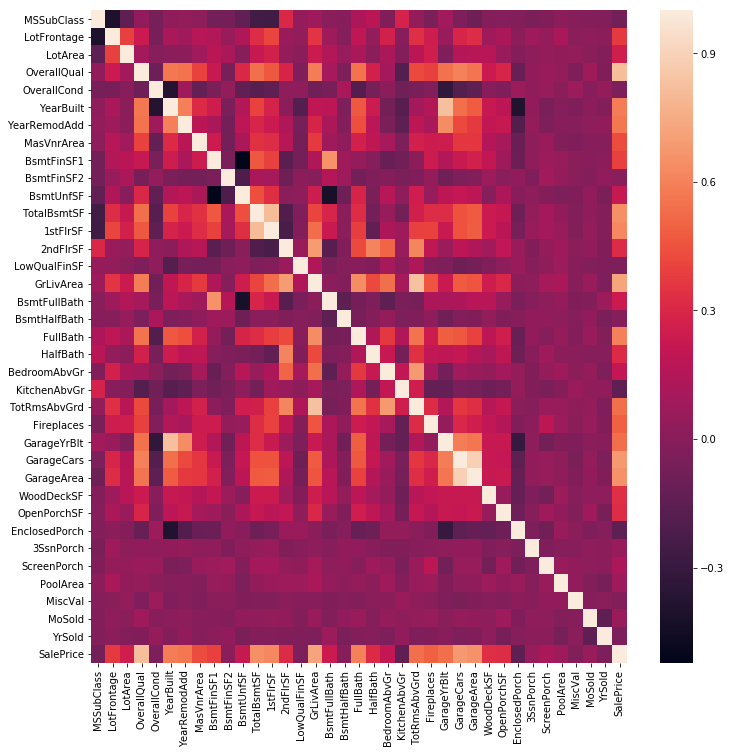

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt  
corrmat = train.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat)
#correlation matrix.